In [ ]:
# 1 === Import necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [108]:
# 2 === Load the dataset from a CSV file and data cleaned
CSV_URL = "clean_house_dataset.csv"  # Replace with actual URL
df = pd.read_csv(CSV_URL)

print("Dataset loaded successfully.")

Dataset loaded successfully.


In [109]:
# === INITIAL SNAPSHOT
print("Initial Data Snapshot:")
print(df.head())

Initial Data Snapshot:
   Size_sqft  Bedrooms  Bathrooms  YearBuilt     Price  Location_City  \
0   1.030281 -1.463643   0.088986  -1.279342  812100.0              1   
1  -0.482463 -1.463643   1.347506   1.326476  547000.0              1   
2   0.468877  0.007430  -1.169534  -1.339942  693700.0              1   
3   1.079817  0.742966   1.347506  -0.915740  848300.0              1   
4   0.788954  1.478502  -1.169534   0.962873  806000.0              0   

   Location_Rural  Location_Suburb  HouseAge  Rooms_per_1000sqft  \
0               0                0  1.279342           -1.061465   
1               0                0 -1.326476           -0.265637   
2               0                0  1.339942           -0.689547   
3               0                0  0.915740           -0.199111   
4               0                1 -0.962873           -0.311002   

   Size_per_Bedroom  Is_City   LogPrice  
0          3.123085        1  13.607380  
1          1.309520        1  13.212206  
2  

In [110]:
# === INITIAL INFO
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Size_sqft           99 non-null     float64
 1   Bedrooms            99 non-null     float64
 2   Bathrooms           99 non-null     float64
 3   YearBuilt           99 non-null     float64
 4   Price               99 non-null     float64
 5   Location_City       99 non-null     int64  
 6   Location_Rural      99 non-null     int64  
 7   Location_Suburb     99 non-null     int64  
 8   HouseAge            99 non-null     float64
 9   Rooms_per_1000sqft  99 non-null     float64
 10  Size_per_Bedroom    99 non-null     float64
 11  Is_City             99 non-null     int64  
 12  LogPrice            99 non-null     float64
dtypes: float64(9), int64(4)
memory usage: 10.2 KB
None


In [111]:
# === INITIAL SHAPE
print("Dataset Shape:")
print(df.shape)

Dataset Shape:
(99, 13)


In [112]:
# === INITIAL MISSING VALUES CHECK
print("Missing Values in Each Column:")
print(df.isnull().sum())

Missing Values in Each Column:
Size_sqft             0
Bedrooms              0
Bathrooms             0
YearBuilt             0
Price                 0
Location_City         0
Location_Rural        0
Location_Suburb       0
HouseAge              0
Rooms_per_1000sqft    0
Size_per_Bedroom      0
Is_City               0
LogPrice              0
dtype: int64


In [113]:
# === COUNT UNIQUE VALUES PER COLUMN 
print("Count of Unique Values per Column:")
print(df.nunique())

Count of Unique Values per Column:
Size_sqft             95
Bedrooms               5
Bathrooms              3
YearBuilt             48
Price                 97
Location_City          2
Location_Rural         2
Location_Suburb        2
HouseAge              48
Rooms_per_1000sqft    98
Size_per_Bedroom      98
Is_City                2
LogPrice              97
dtype: int64


In [114]:
#  3 === Prepare Features & Targets
# Target (y) = Price
# Features (X) = all other columns except Price and LogPrice.

X = df.drop(columns=["Price", "LogPrice"])
y = df["Price"]

print(f"Features shape: {X.shape}, Target shape: {y.shape}")

Features shape: (99, 11), Target shape: (99,)


In [115]:
# 4 === Split Data into Training and Testing Sets
# Split into 80% training and 20% testing.
# Use random_state=42.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape}, Testing set size: {X_test.shape}")


Training set size: (79, 11), Testing set size: (20, 11)


In [116]:
# 5 === Train Models 
# Train a LinearRegression model.
# Train a RandomForestRegressor (use n_estimators=100, random_state=42).

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print("linear regression and random forest models trained successfully.")


linear regression and random forest models trained successfully.


In [120]:


# 6 === Evaluate Performance
# Print R², MAE, MSE, RMSE for both models using a helper function.
def print_metrics(name, y_true, y_pred):
    """Print R², MAE, MSE, RMSE for a model's predictions."""
    r2  = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    print(f"\n{name} Performance:")
    print(f"  R²   : {r2:.3f}")          # higher is better (max = 1.0)
    print(f"  MAE  : {mae:,.0f}")        # lower is better (absolute error)
    print(f"  MSE  : {mse:,.0f}")        # lower is better (squared error)
    print(f"  RMSE : {rmse:,.0f}")       # lower is better (same units as Price)
print_metrics("Linear Regression", y_test, lr_pred)
print_metrics("Random Forest", y_test, rf_pred)


Linear Regression Performance:
  R²   : 0.848
  MAE  : 63,086
  MSE  : 5,718,940,941
  RMSE : 75,624

Random Forest Performance:
  R²   : 0.859
  MAE  : 52,524
  MSE  : 5,283,317,455
  RMSE : 72,686


In [ ]:
# 7 ==  Single-row Sanity Check
# Pick one row from the test set (X_test.iloc[[i]]) and compare actual price with predictions from both models.

i = 3  # pick one row to test
single_row = X_test.iloc[[i]]  # keep as DataFrame
y_actual = y_test.iloc[i]

# Predictions
pred_lr = lr.predict(single_row)[0]
pred_rf = rf.predict(single_row)[0]

# Results
print(f"\nActual Price: ${y_actual:,.0f}")
print(f"Linear Regression Predicted: ${pred_lr:,.0f}")
print(f"Random Forest Predicted:    ${pred_rf:,.0f}")



Actual Price: $554,800
Linear Regression Predicted: $594,041
Random Forest Predicted:    $557,028


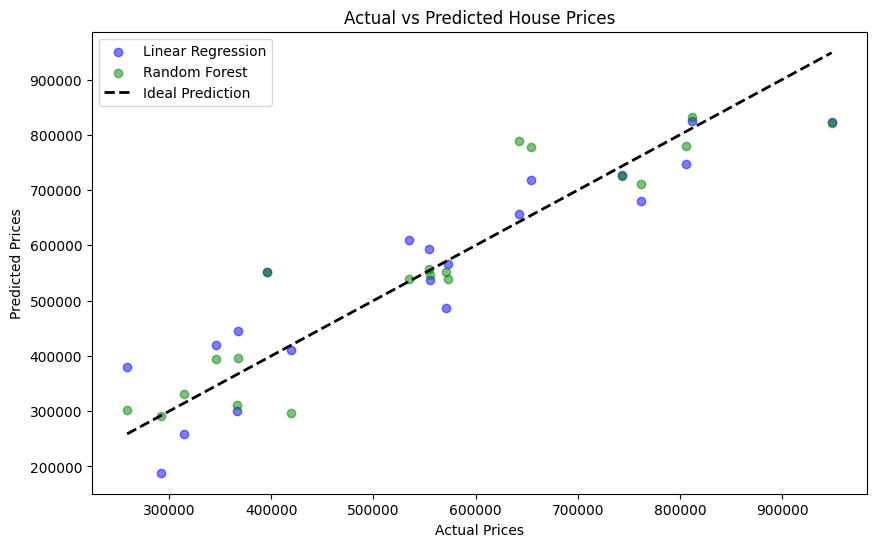

In [ ]:

# 8 === Visualization - Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lr_pred, color='blue', alpha=0.5, label='Linear Regression')
plt.scatter(y_test, rf_pred, color='green', alpha=0.5, label='Random Forest')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Prediction')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.title('Actual vs Predicted House Prices')
plt.show()

# 

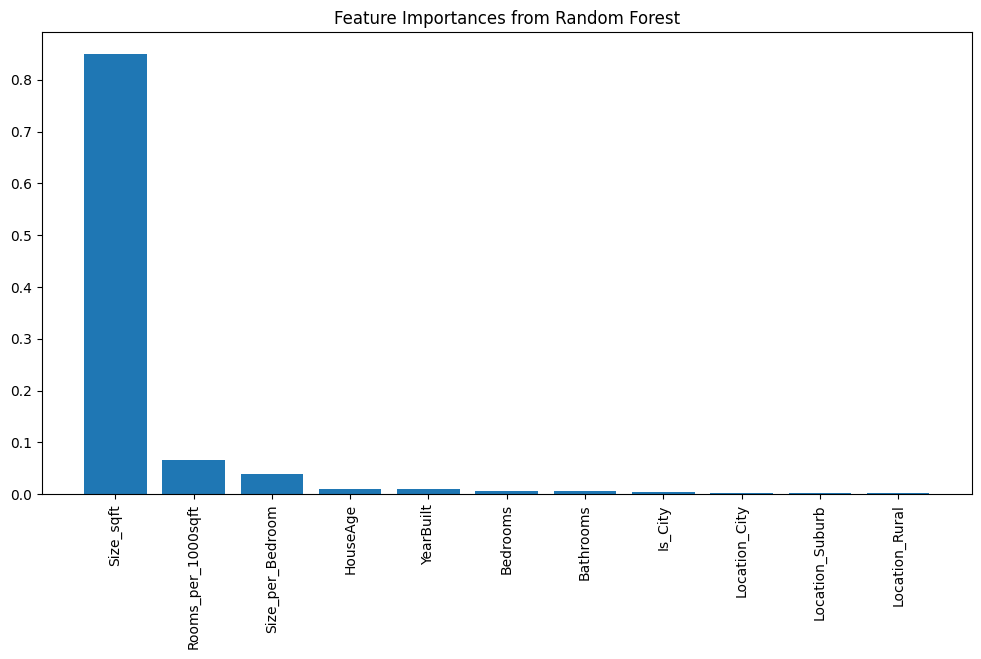

In [126]:
# 9 === Feature Importance from Random Forest
importances = rf.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12, 6))
plt.title("Feature Importances from Random Forest")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.show()

In [127]:

# 10 === Conclusion
print("\nConclusion:")
print("The Random Forest model outperformed the Linear Regression model in predicting house prices, as indicated by higher R² and lower error metrics (MAE, MSE, RMSE). Feature importance analysis from the Random Forest model highlights which features most significantly influence price predictions.")


Conclusion:
The Random Forest model outperformed the Linear Regression model in predicting house prices, as indicated by higher R² and lower error metrics (MAE, MSE, RMSE). Feature importance analysis from the Random Forest model highlights which features most significantly influence price predictions.
